Nama : Moh. Iqbal Fatchurozi

Dataset ini diambil dari : https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction

## Data Collection

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


%matplotlib inline

In [102]:
df = pd.read_csv('data/train-data.csv')

In [103]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Data Understanding & Data Cleaning

In [104]:
df.shape

(6019, 14)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [106]:
round((df.isna().sum()/len(df))*100,2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [107]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

In [108]:
df.duplicated().sum()

0

In [109]:
# Memisahkan data kategorikal dan numerikal
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [110]:
(df['Power'] == 'null bhp').sum()

107

In [111]:
# Mengganti nilai null bhp menjadi None
df['Power'] = df['Power'].replace('null bhp',None)

# Memisahkan data kategorikal dan numerikal
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [112]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1653,Mahindra Scorpio VLX,Kolkata,2012,62000,Diesel,Manual,First,12.05,2179.0,120.0,8.0,6.25


In [113]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [114]:
df.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


In [115]:
for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [116]:
df['Name'].nunique()

1633

In [117]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)


In [118]:
df['Company'].nunique() , df['Model'].nunique()


(26, 182)

In [119]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti,maruti wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai,hyundai creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda,honda jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti,maruti ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi,audi a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,maruti,maruti swift
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,hyundai,hyundai xcent
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,mahindra,mahindra xylo
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,maruti,maruti wagon


### Univariate Analysis

In [120]:
# Menghapus outlier
def remove_outliers(df,col,lower,upper):
    df = df[ (df[col]>lower) & (df[col]<upper) ]
    return df

In [121]:
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

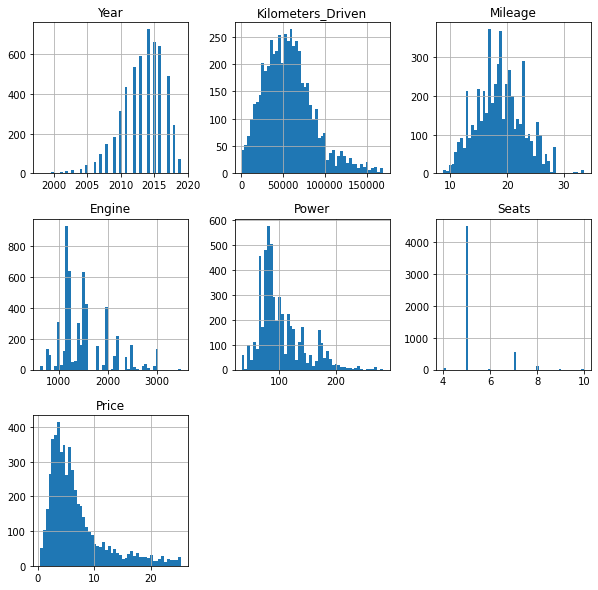

In [122]:
df.hist(bins=50, figsize=(10,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [123]:
df['Fuel_Type'].value_counts()


Diesel    2656
Petrol    2573
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [124]:
# Menghapus data yang nilainya sangat sedikit
df = df[~df['Fuel_Type'].isin(['LPG','Electric'])]

In [125]:
# Owner_type adalah fitur kategorikal ordinal yang perlu di encoded
df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

/tmp/ipykernel_22361/464322727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})


In [130]:
df['Seats'].value_counts()

5.0     4509
7.0      558
8.0      121
4.0       62
6.0       26
10.0       4
9.0        3
Name: Seats, dtype: int64

In [131]:
df = df[df.Seats.between(5,8)]

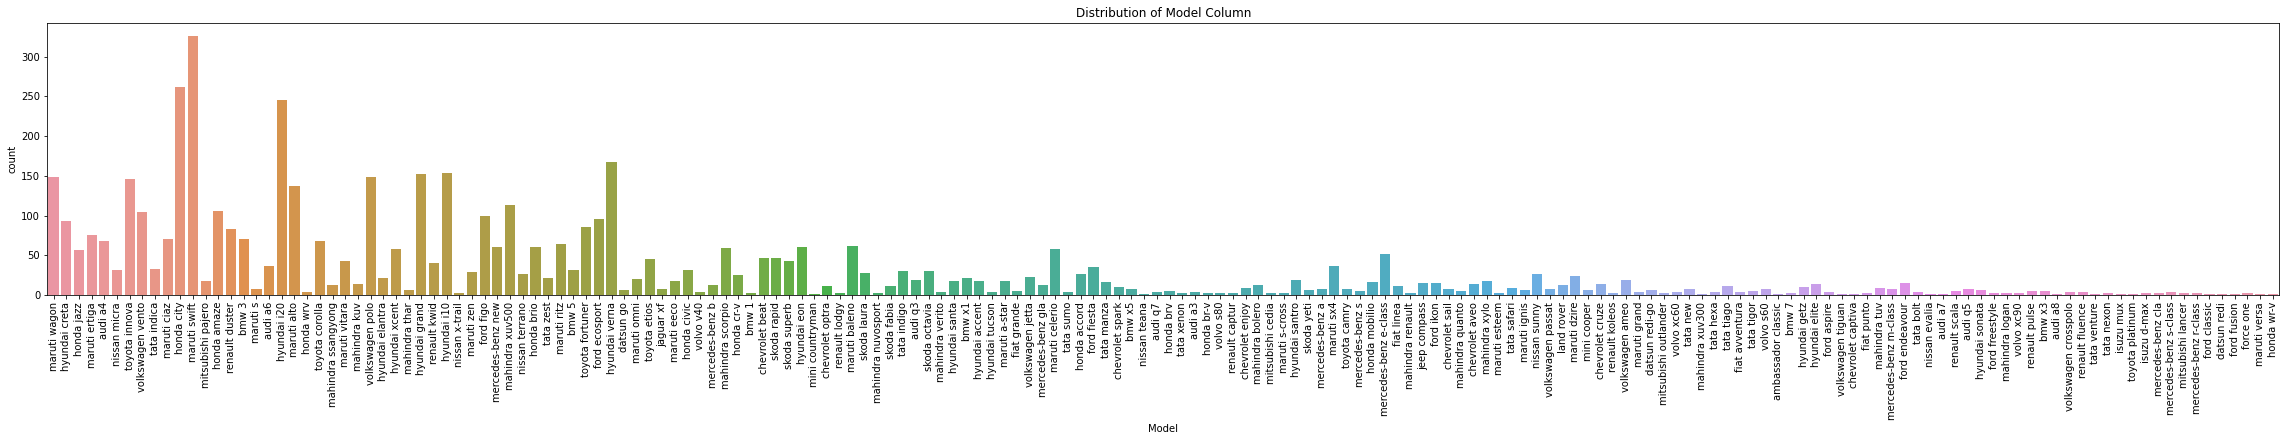

In [142]:
plt.figure(figsize=(40,5))
sns.countplot(x=df['Model']);
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [134]:
df.Model.value_counts()

maruti swift         326
honda city           262
hyundai i20          246
hyundai verna        168
hyundai i10          154
                    ... 
volkswagen tiguan      1
audi a8                1
chevrolet captiva      1
nissan evalia          1
honda wr-v             1
Name: Model, Length: 176, dtype: int64

In [143]:
threshold = 10
counts = df.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
df = df[~df['Model'].isin(to_drop)]

### Bivariate Analysis


In [149]:
agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Year vs Mean Price')
fig.show()

In [150]:
fig = px.scatter(df,x='Kilometers_Driven',y='Price' , width=700 , height =500,title='Kilometers Driven vs Mean Price')
fig.show()

In [151]:
agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
fig.show()

In [152]:
agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Transmission Type vs Mean Price')
fig.show()

In [153]:
agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
fig.show()

In [154]:
fig = px.scatter(df,x='Mileage',y='Price' , width=700 , height =500,title='Mileage vs Mean Price')
fig.show()

In [155]:
fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
fig.show()

In [156]:
fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
fig.show()

In [157]:
agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
fig.show()

In [158]:
agg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Company vs Mean Price')
fig.show()

In [159]:
agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
fig.show()

/tmp/ipykernel_22361/2264866656.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



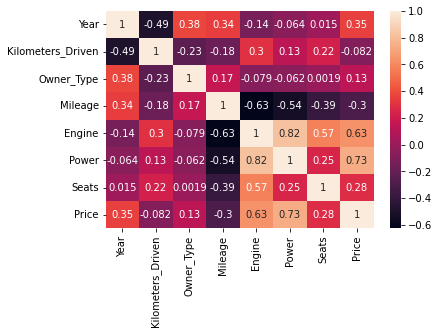

In [160]:
sns.heatmap(df.corr(),annot=True);

## Data Preparation

### One Hot Encoding

In [174]:
df = pd.get_dummies(data =  df, columns = ['Location'])
df = pd.get_dummies(data =  df, columns = ['Fuel_Type'])
df = pd.get_dummies(data =  df, columns = ['Transmission'])
df = pd.get_dummies(data =  df, columns = ['Company'])
df = pd.get_dummies(data =  df, columns = ['Model'])

### Train Test Split

In [175]:
features = df.columns.drop(['Price'])
target = ['Price']

X = df[features]
y = df[target]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [177]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')
     

Total # of sample in whole dataset: 4880
Total # of sample in train dataset: 3904
Total # of sample in test dataset: 976


In [179]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data train
numerical_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()
     

,Kilometers_Driven,Mileage,Engine,Power,Seats
3413,-1.312768,-0.440072,-0.657003,-0.583849,-0.37696
5646,-0.168796,2.298535,-0.551522,-0.354241,-0.37696
1592,-0.981156,0.794647,-0.657003,-0.535226,-0.37696
747,0.690641,-0.390683,-0.245419,-1.299689,-0.37696
4540,0.903406,0.811933,-0.652867,-0.748628,-0.37696


In [180]:
# Normalisasi data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Modelling

### Grid Search

In [181]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
     

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }
        
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [185]:
df_gs = grid_search_model(X,y.values.ravel())

In [194]:
df_gs

,model,best_score,best_params
0,knn,0.437005,{'n_neighbors': 9}
1,boosting,0.773003,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.932332,"{'max_depth': 64, 'n_estimators': 100, 'random..."


In [195]:
acc = pd.DataFrame(index=['accuracy'])

In [196]:
from sklearn.metrics import mean_squared_error

In [201]:
knn = KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train, y_train)
acc.loc['accuracy', 'knn'] = knn.score(X_test,y_test.values.ravel())
knn.score(X_test,y_test)

0.90757818518208

In [205]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 64, random_state = 33)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test.values.ravel())
rf.score(X_test,y_test)

/tmp/ipykernel_22361/1731934040.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9238327495421208

In [206]:
boosting = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 55)                             
boosting.fit(X_train, y_train)
acc.loc['accuracy', 'boosting'] = boosting.score(X_test,y_test.values.ravel())
boosting.score(X_test,y_test)

/home/iqbalf/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7990760273176473

## Evaluation

In [207]:
# Akurasi dari model
acc

,knn,rf,boosting
accuracy,0.907578,0.923833,0.799076


In [208]:
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,0.001419,0.002117
RF,0.000217,0.001745
Boosting,0.00435,0.004602


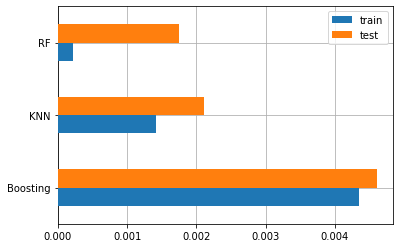

In [209]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)